In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!cp -r /content/drive/MyDrive/esmini.zip /content/esmini.zip
!unzip /content/esmini.zip

In [3]:
%%capture
!apt-get install -y xvfb x11-utils
!pip install ultralytics

In [4]:
import sys, os
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/xvfb -O ../xvfb
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'
!cp -r /content/drive/MyDrive/xvfb /content/xvfb
!chmod 755 /content/xvfb

Starting virtual X frame buffer: Xvfb.


In [ ]:
%rm -r sim_loop

In [5]:
!/content/xvfb start
%cd /content/esmini
!chmod 755 bin/esmini
%cd /content
!git clone https://github.com/patrickw16/sim_loop.git

Starting virtual X frame buffer: Xvfb.
/content/esmini
/content
Cloning into 'sim_loop'...
remote: Enumerating objects: 3612, done.
remote: Counting objects: 100% (564/564), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 3612 (delta 479), reused 517 (delta 445), pack-reused 3048 (from 1)
Receiving objects: 100% (3612/3612), 87.22 MiB | 39.09 MiB/s, done.
Resolving deltas: 100% (3128/3128), done.


In [6]:
#.....
%cd odd_coverage
!git checkout ThreeDimensional
%cd /content

Cloning into 'odd_coverage'...
remote: Enumerating objects: 2809, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 2809 (delta 26), reused 28 (delta 11), pack-reused 2758 (from 1)
Receiving objects: 100% (2809/2809), 44.42 MiB | 34.59 MiB/s, done.
Resolving deltas: 100% (2232/2232), done.
Updating files: 100% (4838/4838), done.
/content/odd_coverage
Branch 'ThreeDimensional' set up to track remote branch 'ThreeDimensional' from 'origin'.
Switched to a new branch 'ThreeDimensional'
/content


In [7]:
%%capture
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
!pip install latex
!sudo apt install cm-super

I will break since no more clusters in red zone.
I successfully finished. There are 1 successful attempts.
Gradient:-1.2464091160291895
b value:0.03548742823231134
[[28.75864378 36.34529391  4.76040002]
 [33.32622044 13.20877145  3.86161791]
 [53.26478671 26.15412018  4.63567845]
 [19.92488709 19.59464645  6.61166023]
 [51.68310159 31.31160771  5.58177516]
 [55.62506524 29.20551236  3.61796934]
 [36.08364056 19.82475221  5.89688242]
 [14.28488913 27.63212193  3.74804888]
 [30.01613849 37.17488786  6.79056507]
 [43.6959527  18.66481813  4.14789411]
 [20.52863453 12.14508084  4.70984028]
 [19.75311294 27.34187872  5.23741176]
 [17.52890896 21.02569056  3.23954607]
 [40.19589947 27.35661849  6.14402598]
 [53.14374035 14.16282466  5.06653617]
 [44.43782987 26.6240053   3.27017763]
 [59.13939251 36.87273988  4.57962042]
 [35.15010963 27.01046097  4.12113655]
 [47.4776137  35.32641215  4.46220923]
 [26.61870805 31.60492099  6.08941462]
 [21.90403754 12.62575042  6.19700332]
 [25.72829174 33.

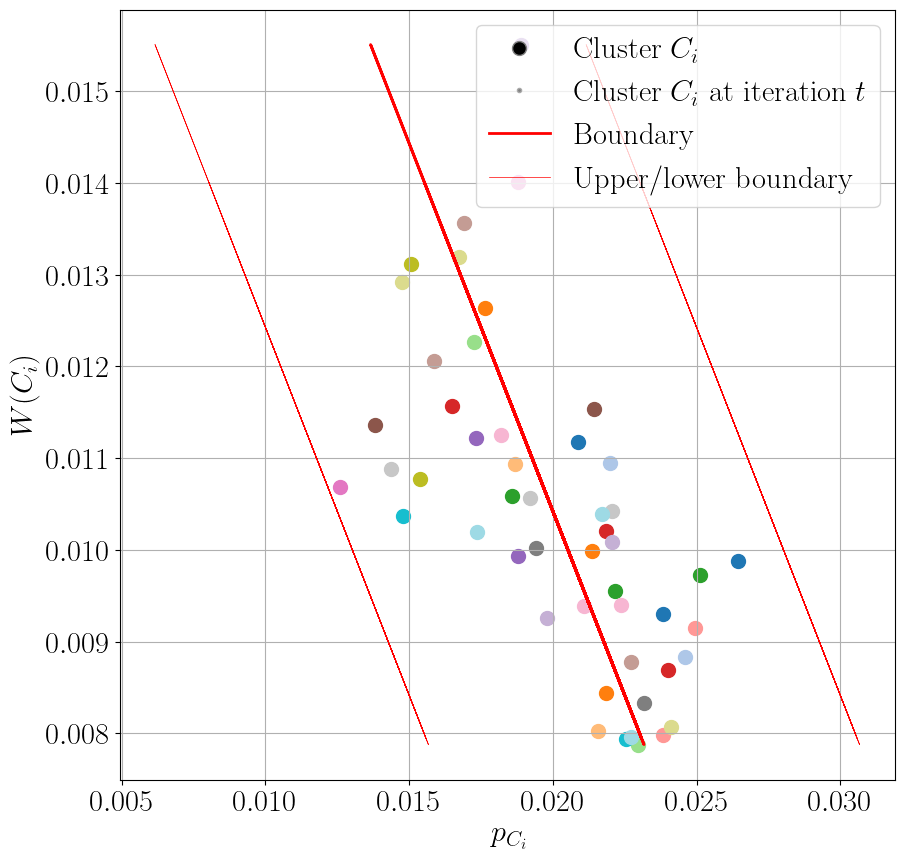

In [8]:
# Generate variance bounded test cases
import numpy as np
from PIL import Image
from IPython.core.display import SVG
from sim_loop.evaluation.cube_based_evaluation import CubeBasedEvaluation
from odd_coverage.odd_coverage.coverage_param_lvl.coverage_param_lvl import CoverageParamLvl

#Generate evaluation points:
my_coverage_param = CoverageParamLvl(
                    number_of_test_values=50,
                    trace_epsilon=0.0075,
                    epsilon_buffer=0.005,
                    number_of_attempts=1,
                    combined_points_data_path='./sim_loop/evaluation/variance_bounded_testing_method/data/prior_points_s_delta_v_delta_ego_max_dec.npy')

param_values, cov_contribution, updated_cluster_traces, adapted_kmeans_labels, re_sampled_scaled, scaler, weighted_within_variance = my_coverage_param.get_optimised_values(plot_path='/content/var_poc_3d_example.svg')

print(param_values)

points = scaler.inverse_transform(re_sampled_scaled)

#SVG(filename='/content/var_poc_3d_example.svg')

In [9]:
# Generate scenarios
from sim_loop.evaluation.variance_bounded_testing_method.simulation.parameter_set_generation import modify_xml

for idx, parameter in enumerate(param_values):

    input_file = '/content/sim_loop/scenarios/cut-in.xosc'  # Replace with your input file path
    output_file = f'/content/sim_loop/scenarios/variance_bounded/{idx}_cut-in.xosc'  # Replace with your desired output file path
    new_s_delta = param_values[idx, 0]  # New value for s_delta
    new_v_delta = param_values[idx, 1]  # New value for v_delta

    modify_xml(input_file, output_file, new_s_delta, new_v_delta)

In [14]:
from multiprocessing.pool import ThreadPool
import subprocess
import sys
import os.path

# globals
launched = 0
done = 0
n_runs = 0

def print_status():
    print('Launched: {}/{} Done: {}'.format(launched, n_runs, done), end='\r', flush=True)

def launch_scenario(index):
    global launched
    global done
    launched += 2
    print_status()
    p = subprocess.run(
        ['python', '/content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py'] + ['--window 60 60 800 400']+ ['--headless'] + ['--osc'] + [f'/content/sim_loop/scenarios/variance_bounded/{str(index)}_cut-in.xosc'] + ['--logfile_path'] + [f'/content/{str(index)}_log.txt'] + [str(param_values[idx,2])],
    )

    done += 1
    print_status()


if __name__ == '__main__':

    #n_runs = len(param_values)
    print_status()

    n_runs = 20

    with ThreadPool() as p:
        p. map(launch_scenario, range(n_runs))

    print()

KeyboardInterrupt: 

In [15]:
!python /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py --window 60 60 800 400 --headless --osc /content/sim_loop/scenarios/variance_bounded/5_cut-in.xosc

esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
Player arguments:  /content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py --window 60 60 800 400 --headless --osc /content/sim_loop/scenarios/variance_bounded/5_cut-in.xosc
esmini GIT REV: v2.40.3-0-9fa4bae8
esmini GIT TAG: v2.40.3
esmini GIT BRANCH: tags/v2.40.3^0
esmini BUILD VERSION: N/A - client build
No fixed timestep specified - running in realtime speed
Generated seed 387971068
Loading /content/sim_loop/scenarios/variance_bounded/5_cut-in.xosc (v1.1)
0 variables
Unsupported geo reference attr: +no_defs
Unsupported object type: rail-pole - interpret as NONE
Unsupported object type: rail-pole - interpret as NONE
Unsupported object type: guide-post - interpret as NONE
Unsupported object type: guide-post - interpret as NONE
Loaded OpenDRIVE: /content/esmini/resources/xodr/e6mini.xodr
Expr ${250/3.6}

In [ ]:
# analyze logs and store results

In [ ]:
%mkdir logs

In [ ]:
# prompt: move all log files to logs folder

import shutil
import glob

# Move all log files to the logs folder
log_files = glob.glob("*.txt")  # Find all files ending with .log in the current directory
for log_file in log_files:
  try:
    shutil.move(log_file, "logs/")  # Move the file to the logs/ directory
  except FileNotFoundError:
    print(f"Error: The 'logs' directory does not exist.")
  except shutil.Error as e:
    print(f"Error moving file {log_file}: {e}")

In [ ]:
%rm -r logs_old

In [ ]:
# prompt: zip the logs folder

import shutil
import os

def zip_logs():
  # Check if the logs directory exists
  if os.path.exists("logs"):
    try:
      shutil.make_archive("logs", "zip", "logs")
      print("Logs folder zipped successfully to logs.zip")
    except Exception as e:
      print(f"Error zipping logs folder: {e}")
  else:
    print("Error: logs folder not found.")

zip_logs()

Logs folder zipped successfully to logs.zip
